# Group 22: Predicting Algerian Forest Fires #

## Introduction ##
We have all seen the rise in the number of forest fires in the past few years, and scientists and climate activists worldwide have raised their concerns. While natural in few ecosystems, these recent forest fires root their cause in the global rise in temperature and poor land management by authorities. Due to this, no matter whether a wildfire's origin is due to human intervention or natural, the drier climate makes it easy for a fire to spread over a region quite intensely.<br>
These fires are a clear call for change because they can result in irreparable damage to forest ecosystems. The gases released due to these fires travel to the cities, causing health crises. While governments worldwide introduce initiatives to promote sustainable practices and the general public abides by them, it is also vital for scientists to know which forests are prone to fires. Through this project, we intend to help this cause by creating a model that predicts forest fires in a specific region  - Algeria. Thus, the question that we seek to answer is: "Can we predict a wildfire in Algerian forests based on common daily measurements?"

### Data set used:
Algerian forest fires: https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv<br>
This data set has fourteen variables, thirteen of which are numerical, and one is categorical, along with 243 observations.

## Loading the data set into R and wrangling it

### Loading all the libraries that we will use

In [1]:
# install.packages("skimr")
# install.packages("GGally")
# install.packages("tidyverse")
# install.packages("repr")
# install.packages("tidymodels")
# install.packages("kknn")
library(tidyverse)
library(repr)
library(kknn)
library(GGally)
library(tidymodels)
library(skimr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

── Attaching packages ────────────────────────────────────── tidymodels 0.1.2 ──

✔ broom     0.7.6      ✔ recipes   0.1.15
✔ dials     0.0.9      ✔ rsample   0.0.9 
✔ infer     0.5.4      ✔ tune      0.1.3 
✔ modeldata 0.1.0      ✔ workflows 0.2.2 
✔ parsnip   0.1.5      ✔ yardstick 0.0.8 

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats

### Loading the dataset into R

In [2]:
# URL that contains the dataframe that we want to examine
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv"

# Reading dataframe into R
algerian_forest_fires <- read_csv(url,skip = 1)

# Examining the data frame
# algerian_forest_data


# Inspecting the parsing failures

# algerian_forest_fires[123, 1:14] -- Empty row between two data sets
 
# algerian_forest_fires[168, 1:14] -- Needs to be fixed

algerian_forest_fires[168, 10] = '14.6'
algerian_forest_fires[168, 11] =  '9'
algerian_forest_fires[168, 12] =  '12.5'
algerian_forest_fires[168, 13] =  '10.4'
algerian_forest_fires[168, 14] =  "fire"


── Column specification ────────────────────────────────────────────────────────
cols(
  day = col_character(),
  month = col_character(),
  year = col_character(),
  Temperature = col_character(),
  RH = col_character(),
  Ws = col_character(),
  Rain = col_character(),
  FFMC = col_character(),
  DMC = col_character(),
  DC = col_character(),
  ISI = col_character(),
  BUI = col_character(),
  FWI = col_character(),
  Classes = col_character()
)


Warning message:
“2 parsing failures.
row col   expected     actual                                                                                                       file
123  -- 14 columns 1 columns  'https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv'
168  -- 14 columns 13 columns 'https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv'
”


### Upon examination we infer that:
<p>
    <li>File that we read contains 2 dataframes.</li>
    <li>The dataset's column types aren't parsed correctly</li>
<p>To extract the target data frame, we will split the file into two dataframes, tidy both of them, and lastly join them.</p>

### Extracting and tidying Bejaja region data set

In [3]:
# Retrieving the bejaja data set
bejaja_forest <- slice(algerian_forest_fires, 2:122)

#Fixing the collumn types of the numerical variables
bejaja_forest_data <- bejaja_forest %>% 
    select(day:FWI) %>% 
    map_df(as.double) 

# Selecting the observation class data
bejaja_forest_fires <- bejaja_forest %>% 
    select(Classes) 

# Joining numerical variable and observation class data 
bejaja_forest_tidy <- cbind(bejaja_forest_data,bejaja_forest_fires)
#head(bejaja_forest_tidy)

### Extracting and tidying Sidi-Bel region data set

In [4]:
#Finding the number of rows in the original dataset
number_of_rows <- nrow(algerian_forest_fires)

# Retrieving the sidi-bel data set
sidi_bel_forest <- slice(algerian_forest_fires, 125:number_of_rows)


#Fixing the collumn types of the numerical variables
sidi_bel_forest_data <- sidi_bel_forest %>% 
    select(day:FWI) %>% 
    map_df(as.double)


# Selecting the observation class data
sidi_bel_forest_fires <- sidi_bel_forest %>% 
    select(Classes)

# Joining numerical variable and observation class data 
sidi_bel_forest_tidy <- cbind(sidi_bel_forest_data,sidi_bel_forest_fires)

### Joining our two dataframes

In [5]:
algerian_forest_fires_tidy <- full_join(bejaja_forest_tidy, sidi_bel_forest_tidy)
# algerian_forest_fires_tidy

# The resulting data frame is tidy and ready for the further analysis

Joining, by = c("day", "month", "year", "Temperature", "RH", "Ws", "Rain", "FFMC", "DMC", "DC", "ISI", "BUI", "FWI", "Classes")



## Explanatory data analysis

### Splitting our data

#### Choosing the split proportion 
<p>
<li> When choosing a split percentage, you are forced to decide between a more accurate evaluation of your model's performance and the better-trained model. </li>
<li>We choose to split our data set into 75% of training data and 25% of testing data. We reasoned that since our data set is not large, allocating more observations to the testing data set would drastically decrease our model's performance.
</li>
 </p>


In [6]:
# Setting the seed 
set.seed(2021)
# Splitting the data set
algerian_forest_fires_tidy <- mutate(algerian_forest_fires_tidy, Classes = as.factor(Classes))
forest_split <- initial_split(algerian_forest_fires_tidy, prop = 0.75, strata = Classes)
forest_train <- training(forest_split)
forest_test <- testing(forest_split)

### Creating summary table 

In [7]:
# Specifying the summary function
my_skim <- skim_with(numeric = sfl(median, mean,  sd, min, max),
                                   append = FALSE)

# Creating summary table
summary_df <- my_skim(forest_train) %>% 
    tibble::as_tibble() %>% 
    select(skim_variable:numeric.max)

### Table 1: Summary statistics of training data

In [8]:
summary_df

skim_variable,n_missing,complete_rate,factor.ordered,factor.n_unique,factor.top_counts,numeric.median,numeric.mean,numeric.sd,numeric.min,numeric.max
<chr>,<int>,<dbl>,<lgl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Classes,0,1,FALSE,2,"fir: 104, not: 79",NA,NA,NA,NA,NA
day,0,1,NA,NA,NA,16.0,16.2622951,8.723283,1.0,31.0
month,0,1,NA,NA,NA,8.0,7.5519126,1.122343,6.0,9.0
year,0,1,NA,NA,NA,2012.0,2012.0000000,0.000000,2012.0,2012.0
Temperature,0,1,NA,NA,NA,32.0,31.9125683,3.558461,22.0,42.0
RH,0,1,NA,NA,NA,64.0,62.4153005,14.480081,24.0,89.0
Ws,0,1,NA,NA,NA,15.0,15.4699454,2.751208,6.0,26.0
Rain,0,1,NA,NA,NA,0.0,0.7868852,1.965567,0.0,16.8
FFMC,0,1,NA,NA,NA,83.8,77.7551913,14.384399,28.6,96.0


#### Imbalance of class labels 
<p> After a quick look at a summary table, we can see that there are more fire class labels than non-fire observations. <br>
    We believe that this is not an issue since the 30% difference in the number of observations does not warrant upsampling the data. <br>
    On the contrary, upsampling the data in this example would probably result in worse performance since each non-fire observation <br>
    would gain more weight, making our model favour non-fire observations.<p/>

### Ploting our data 

In [9]:
# Removing the date data
forest_train <- select(forest_train,Temperature:Classes)
# We are using ggpairs to plot our variables against each other and see correlation
variables_plot  <- ggpairs(forest_train, columns = c("Temperature","RH","Ws","Rain","FFMC","DMC","DC","ISI","BUI","FWI"),
      aes(colour = Classes))  +
      theme(text = element_text(size = 18),
       axis.text = element_text(size = 10)) 

### Figure 1: Plots of all the numerical variable pairs and their correlation.

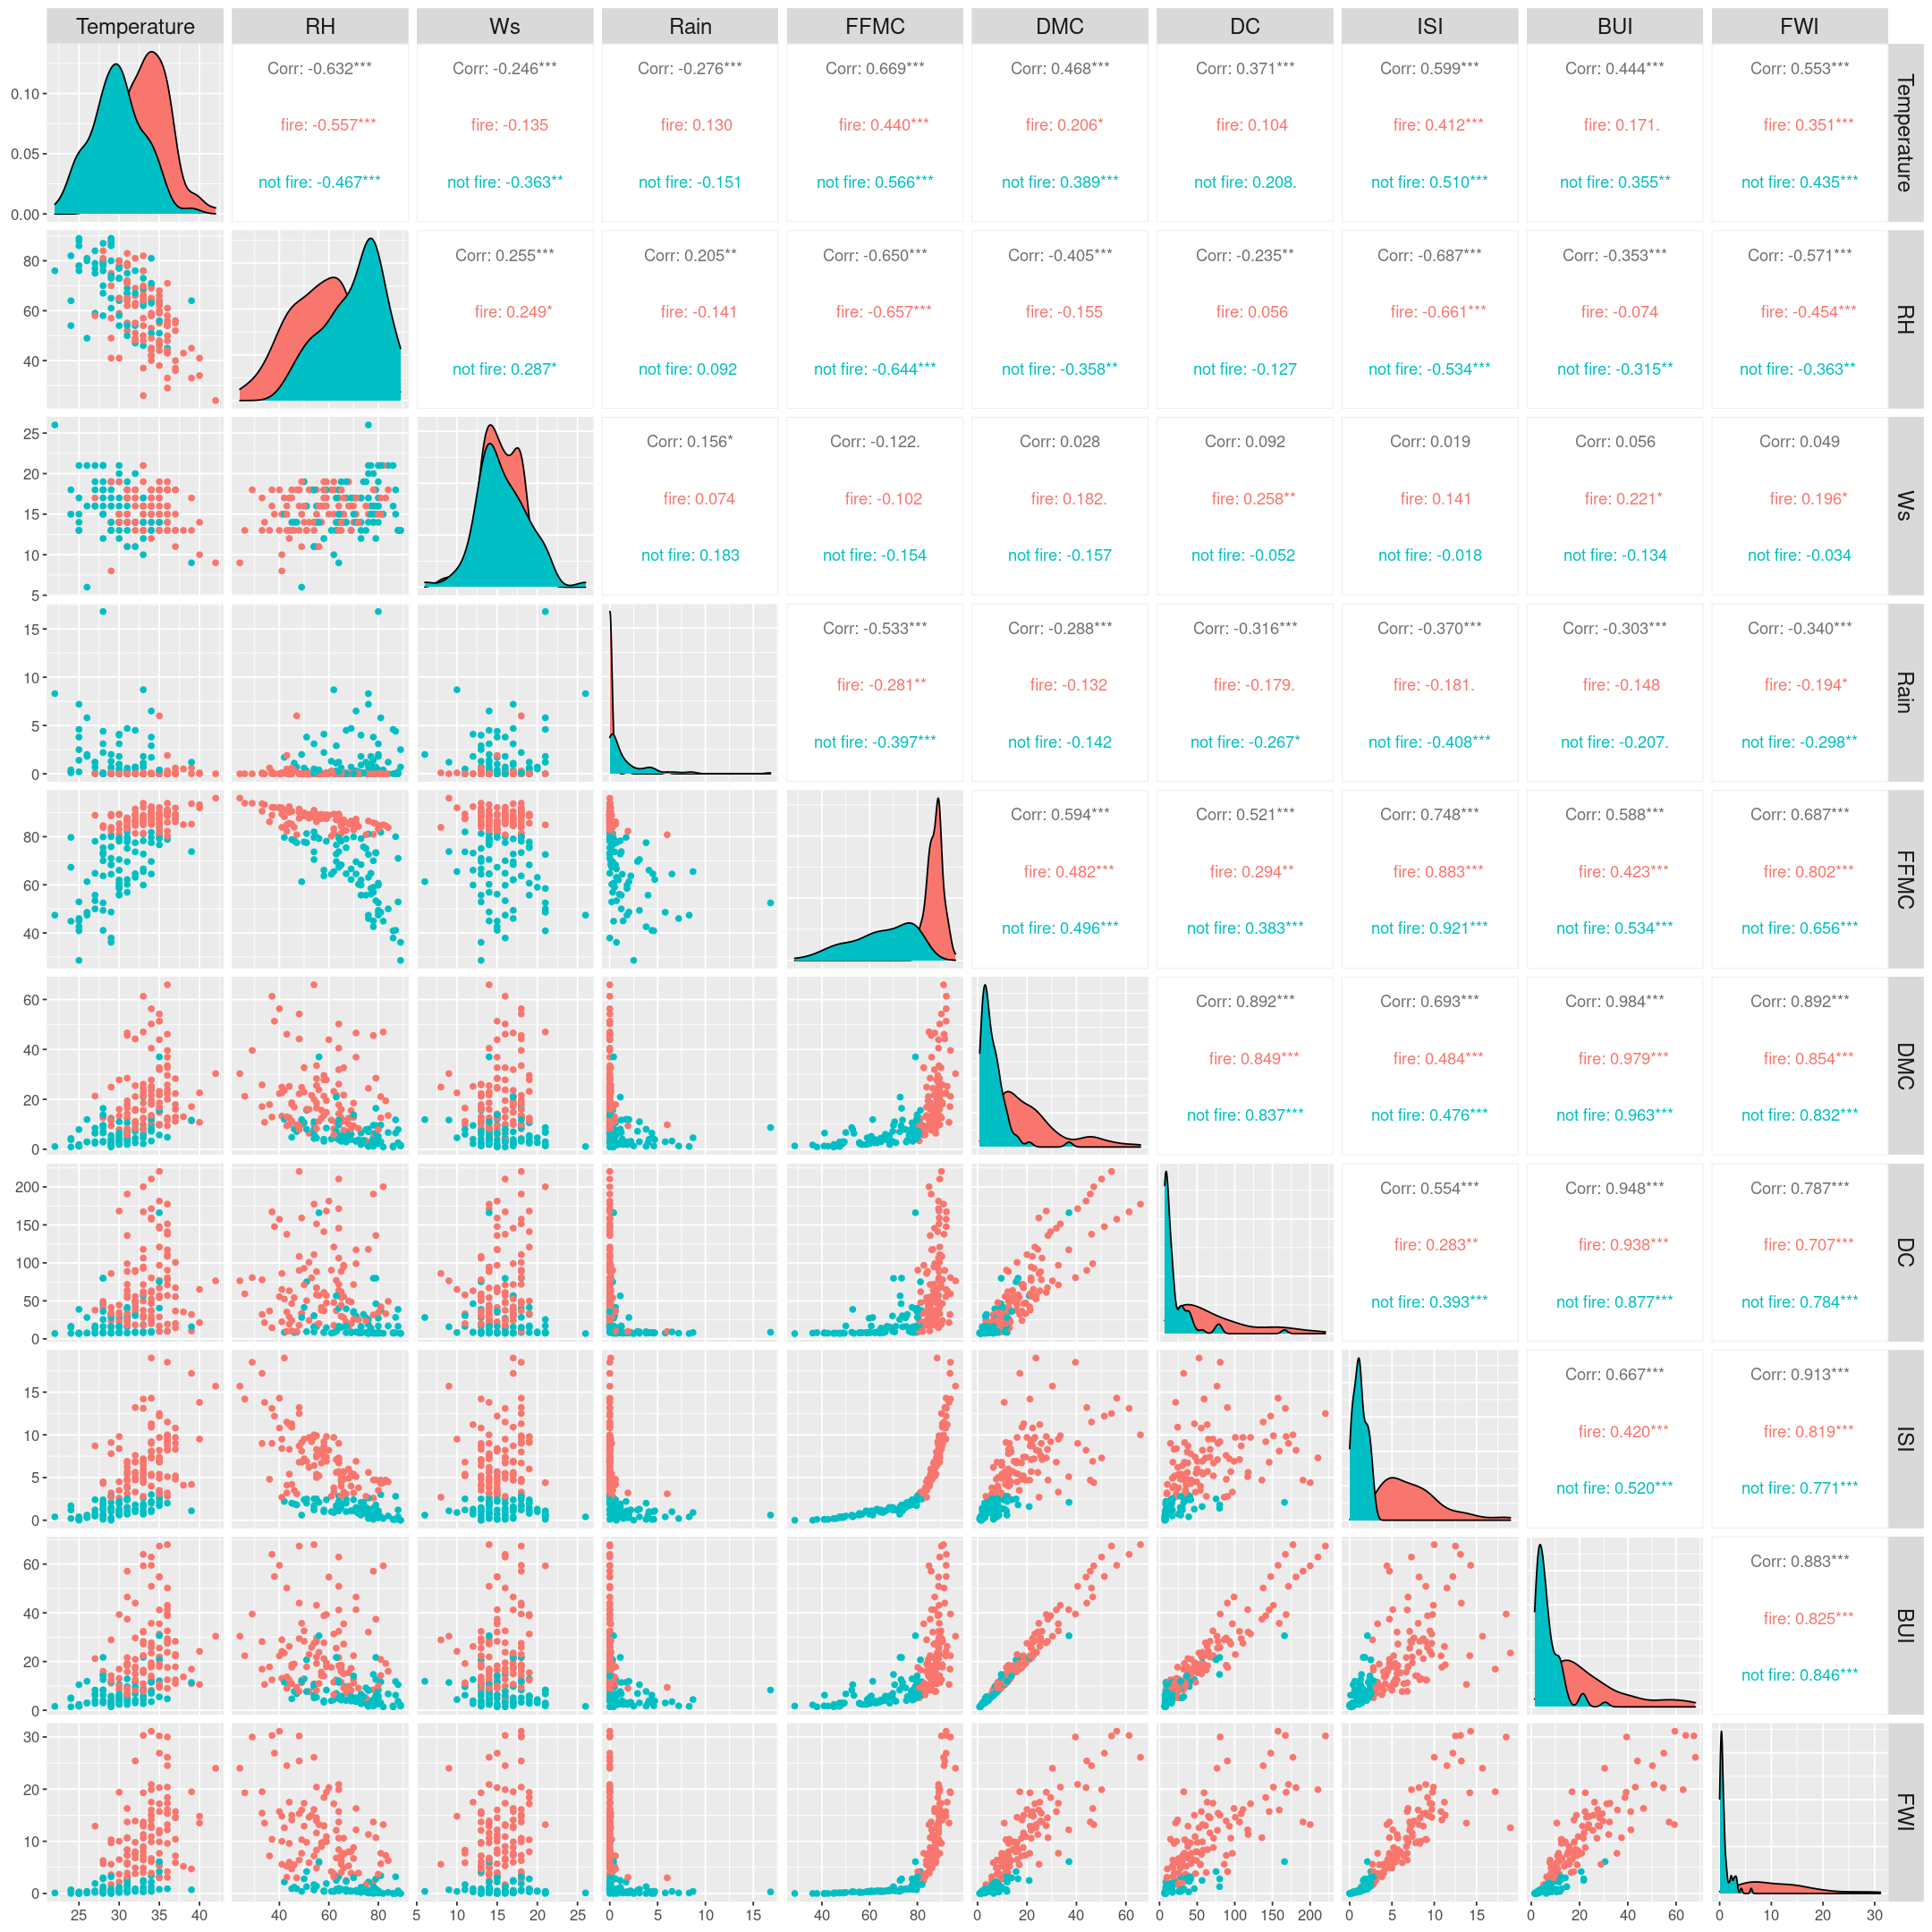

In [10]:
# Plot options
options(repr.plot.width = 18, repr.plot.height= 18)
variables_plot

## Methods
* The question we seek to answer through this project falls under the classification category. Therefore, before splitting our data into training and testing data sets, we made the variable that we will predict a factor.
* The outcome variable that we will be predicting will be the "Classes" variable that tells us whether there was a fire or not. We have chosen  Duff Moisture Content (DMC) and Initial Spread Index (ISI) as our model's predictors.
* These predictors are derived from temperature, rain, wind speed, and humidity calculated and predicted by scientists daily.
* DMC represents the fuel moisture of decomposed organic material present on the forest floor. ISI estimates the spread potential by integrating the forest's moisture content and the wind speed at the given time (Han et al. 1992).
* During our explanatory data analysis, we found that these two variables give a definite description of when a fire occurs. Looking at figure one, at DMS v. ISI plot specifically, we can see a clear separation between fire and non-fire observations. We hope that this would help our knn model to distinguish observations easily and will help it to perform well on new observations. While we acknowledge that this could not be the most accurate method for choosing predictors, we believe it should suffice due to the small number of observations.
* Now that we have defined the outcome variable and predictors, we will put it into a recipe with data preprocessing steps such as scaling and centring data. Also, we will create an initial model to tune the number of neighbours that yields the highest accuracy.
* To choose the best number of neighbours, we will create a cross-validation set. Using cross-validation ensures that we won't overfit our data and provides an estimate of how our model will perform on new data. A high number of folds in cross-validation ensures that the model output has a lower standard error and increases computational cost. Since we don't have that much data and computational time wouldn't be a problem, we will fold our training data set ten times.
* After putting the entire process in a workflow, we will determine the k value by choosing the result which had the highest accuracy. We obtained that the knn model with k set to five yields the highest accuracy.
* This model will then be used to predict our test set's class labels, with the model specification using the K value obtained during the training phase, and then determine its accuracy on new observations.
* For our visualization, we will create a decision boundary plot. To observe which class label our model predicts for different values of predictors.

### Tuning our model

In [11]:
# Setting the seed value
set.seed(2021)

# Creating a model for tuning 
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
    set_engine("kknn") %>% 
    set_mode("classification")

# Creating a data pre-proccessing recipe
ff_recipe <- recipe(Classes ~  ISI + DMC , data = forest_train) %>% 
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

# Creating a cross validation set 
ff_vfold <- vfold_cv(forest_train, v = 10, strata = Classes)

# Creating a grid with k values to test
gridvals <- tibble(neighbors = seq(1:15))

# Fitting our model with different k values
knn_results <- workflow() %>%
    add_recipe(ff_recipe) %>%
    add_model(knn_spec) %>%
    tune_grid(resamples = ff_vfold, grid = gridvals) %>%
    collect_metrics()

# Filtering accuracy values 
cross_val_acc  <- knn_results %>% 
    filter(.metric == "accuracy")

# Plotting number of neighbours against cross validation accuracy 
accuracy_plot  <- cross_val_acc  %>% 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_line() +
    labs(x = "Number of neighbors", y = "Accuracy") +
    scale_x_continuous(breaks=1:15) +
    theme(text = element_text(size = 20),
       axis.text = element_text(size = 16))

### Figure 2: Cross-validation accuracy against number of neighbors

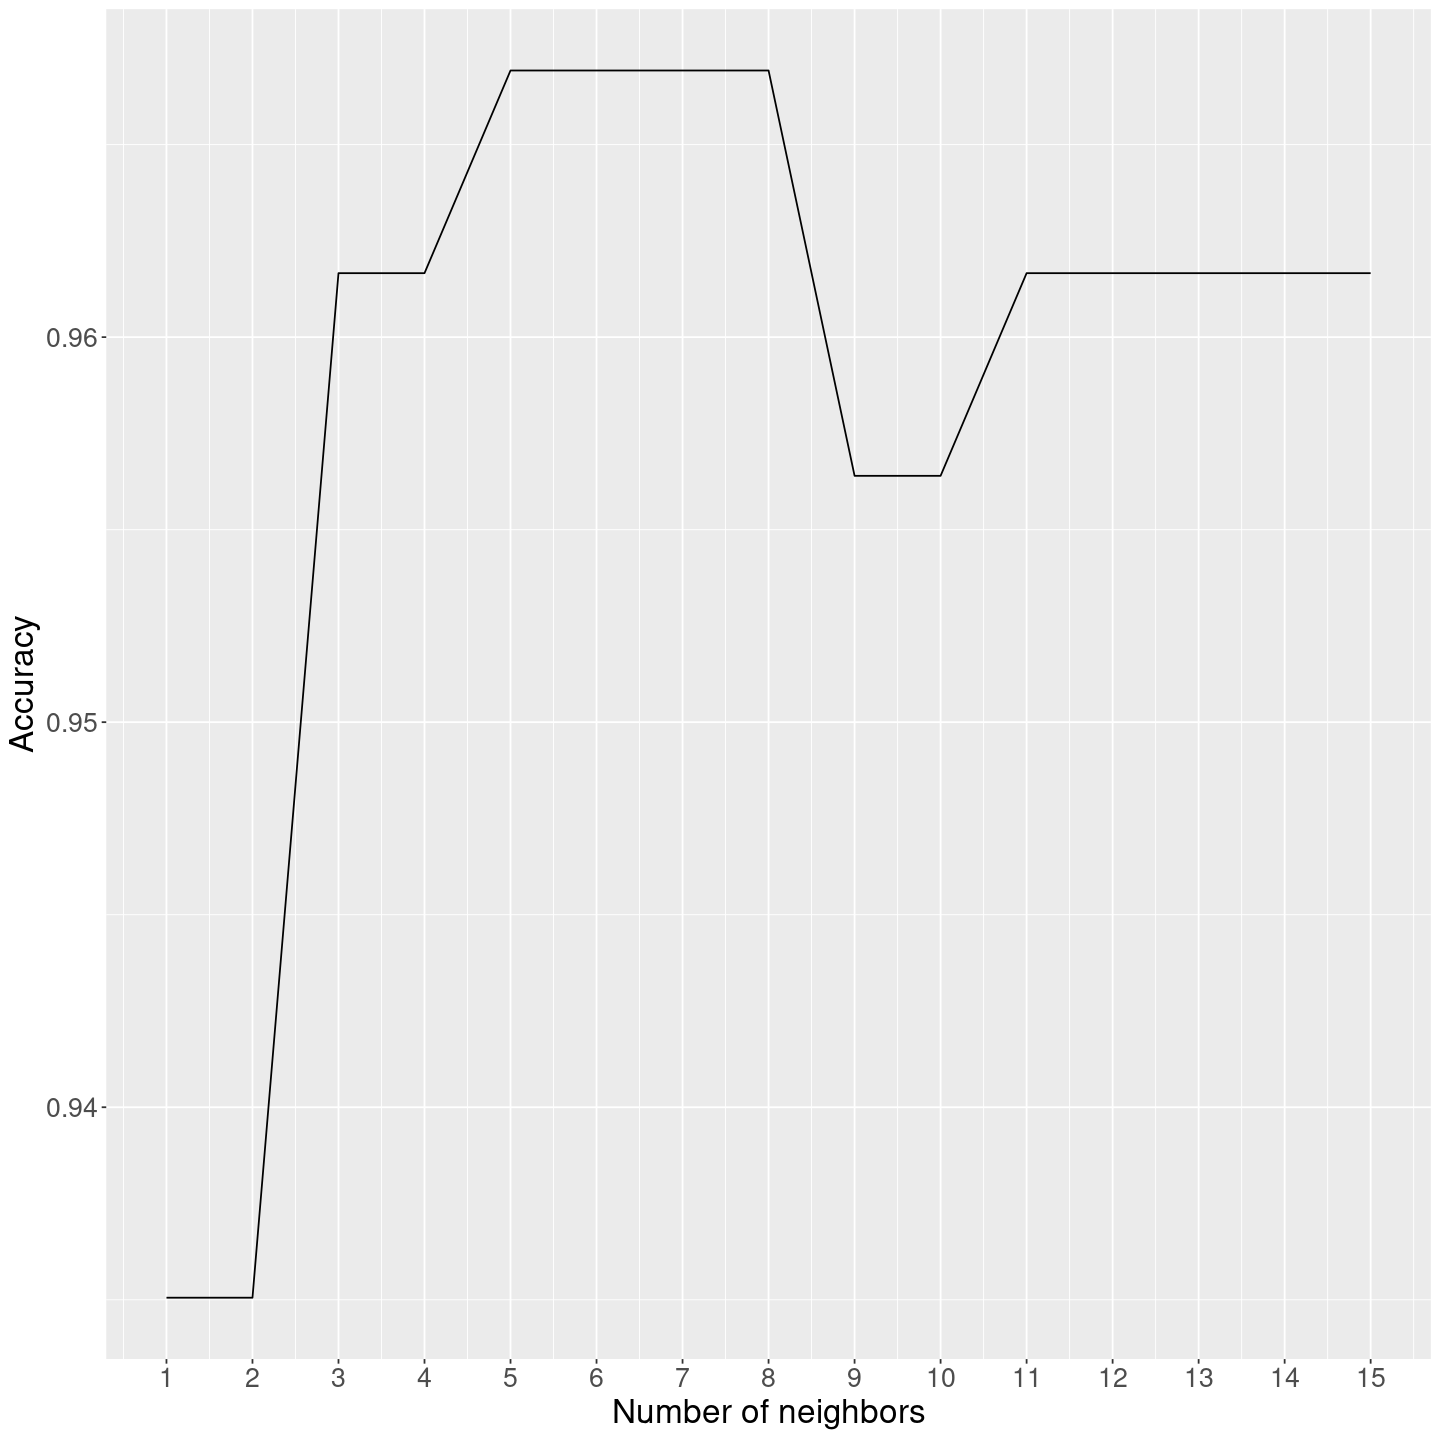

In [12]:
# Plot options
options(repr.plot.width = 12, repr.plot.height= 12)
accuracy_plot

In [13]:
# Selecting a model with the highest accuracy 
best_k <-  cross_val_acc %>% 
    arrange(desc(mean)) %>% 
    slice(1) %>% 
    select(neighbors) %>% 
    pull()

### Testing our model

In [14]:
# Setting seed value
set.seed(2021)

# Creating final model
ff_knn <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) %>% 
    set_engine("kknn") %>% 
    set_mode("classification")

# Fitting the model
ff_fit <- workflow() %>% 
    add_recipe(ff_recipe) %>% 
    add_model(ff_knn) %>% 
    fit(data = forest_train)

# Using our fit to predict on test set
ff_predictions <- predict(ff_fit, forest_test) %>% 
    bind_cols(forest_test)

# Estimating accuracy of our classifier
ff_metrics <- ff_predictions %>% 
    metrics(truth = Classes, estimate = .pred_class)

# Creating a confusion matrix 
ff_conf_mat <- ff_predictions %>%
    conf_mat(truth = Classes, estimate = .pred_class)

### Table 2: Model's performance

In [15]:
ff_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9833333
kap,binary,0.9662162


### Table 3: Confusion matrix

In [16]:
ff_conf_mat

          Truth
Prediction fire not fire
  fire       33        0
  not fire    1       26

### Creating a data frame to predict on

In [17]:
# Creating vector with 100 possible values in ISI range
isi_seq <- seq(from = min(algerian_forest_fires_tidy$ISI, na.rm = TRUE), 
               to = max(algerian_forest_fires_tidy$ISI, na.rm = TRUE), 
               length.out = 100)

# Creating a vector with 100 possible values in DMC range 
ffmc_seq <- seq(from = min(algerian_forest_fires_tidy$DMC, na.rm = TRUE), 
                to = max(algerian_forest_fires_tidy$DMC, na.rm = TRUE), 
                length.out = 100)


# Creating a data set using the combinations of vectors we created earlier
grid_points <-  expand.grid(ISI = isi_seq,
                            DMC = ffmc_seq)

# Creating a data set with 10000 observations to construct a decision boundary plot
grid_predicted <- ff_fit %>% 
    predict(grid_points) %>% 
    bind_cols(grid_points) 


### Creating decision boundary plot

In [18]:
# Creating a desicion boundary plot 
bui_isi_boundary_plot <- ggplot(grid_predicted, aes(x = DMC, y = ISI, color = .pred_class)) +
    geom_point(alpha = 0.3,size = 5.) + 
    geom_point(data = algerian_forest_fires_tidy, aes(x = DMC, y = ISI, color = Classes)) +
    labs(y = "Initial spread index", x = "Duff Moisture Code", color = "Class label") +
     theme(text = element_text(size = 20),
       axis.text = element_text(size = 16))

### Figure 3: Desicion boundary plot

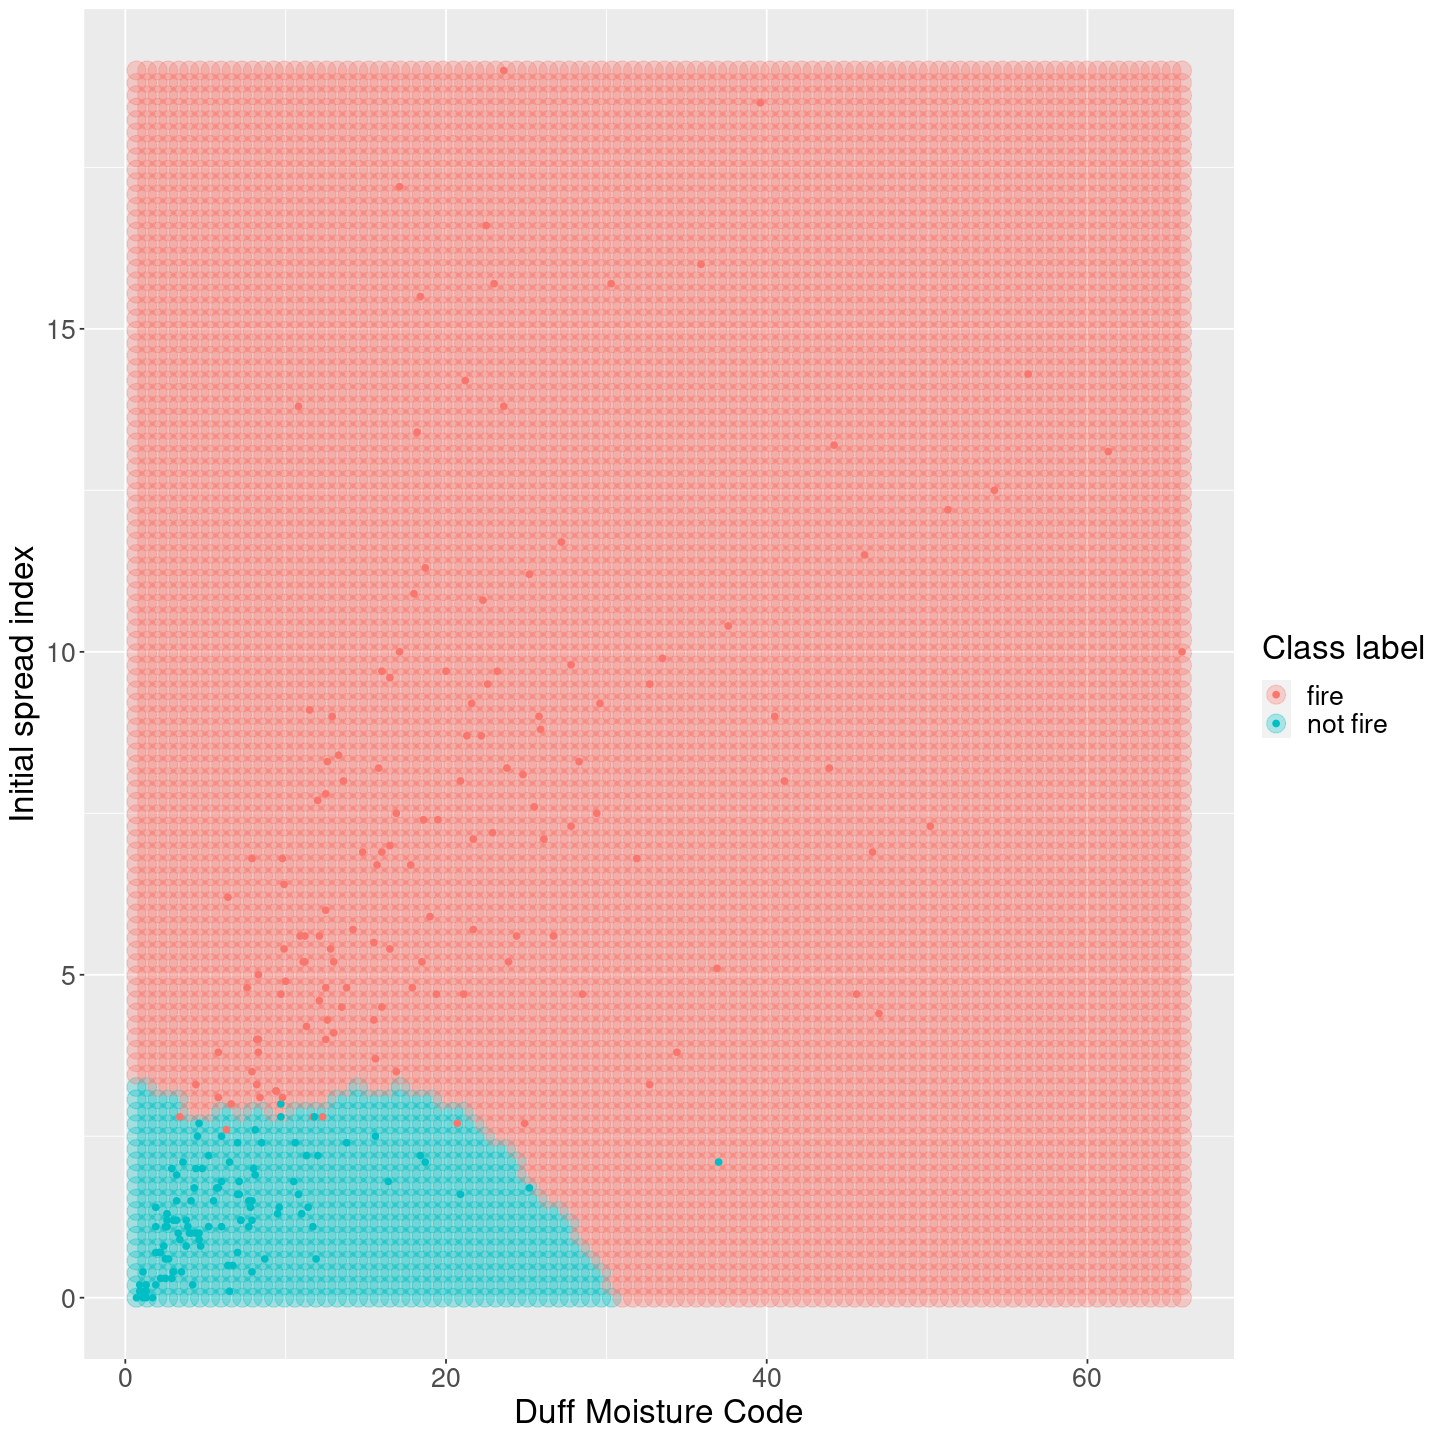

In [19]:
# Plot options
options(repr.plot.width = 12, repr.plot.height= 12)
bui_isi_boundary_plot

## Disscussion 

#### Results:
<li>Overall, we developed a K-means classifier that could help predict future forest fires using common measurements. The model turned out to have 98% accuracy. Thus it could help detect and prevent future forest fires. Looking at the table three above, our model miscategorized only one observation, and even then, it miscategorized a fire observation as a non-fire. We think that it shouldn't be an issue, or we could even speculate that natural causes did not cause this forest fire. </li>

#### Did we expect this outcome? 
<li> We did expect our model to perform relatively well because we knew that the variables used in our data had a good correlation, but to achieve such a high level of accuracy is something we didn’t foresee. Now that we look back at this project in hindsight, we believe that there are two reasons why our classifier was able to achieve this accuracy. The first one is that we carefully considered what number of predictors to pick predictors that are not directly related since we read up that this could introduce bias. The other reason is that we chose a predictor pair that would make it easy for our model to distinguish fire and non-fire observations. However, there is still an inherent amount of luck, and there are still many things out of our control. </li>

#### Significance:
<li> Being able to predict forest fires in the future using these other variables could be very useful, as it could not only aid in prevention of these fires, but also — on a macro level — contribute to environmental sustainability. Wotton et al (2010) suggested in their study that a 25% increase in the occurence of forest fires will be observed in Canada by the year 2030. Utilising this algorithm to prevent these forest fires could have a huge impact on helping sustain our environment. Furthermore, oxygen levels, lives of endangered species and even global warming could all see huge improvements by having the ability to predict and prevent future forest fires. We think our algorithm is of great utility in this area. </li>

#### Further disscussion: 
<li>In future, we can look into how our model would perform in different regions. The predictors that we used to create our model are amongst the most commonly collected types of observations globally, so scalability should not be an issue. Also, the observations that we used are part of the Canadian FWI system. As Torres et al.(2018) state, FWI has the most significant linear correlations to forest fire prediction compared to other systems, making our model highly relevant. However, our model's relevancy could be diminished due to the small number of observations and the fact that they all were collected in the same region. Thus, our data is susceptible to minor anomalies such as anthropogenic factors and could be suited to predicting forest fires in moderate climate areas. Future studies could look into this and evaluate the efficacy of our model for the prediction of forest fires on a large scale. 

## References (APA):

<li> Torres, Fillipe Tamiozzo Pereira, Lima, Gumercindo Souza, & Alvares, Bráulio Furtado. (2018). Fire behavior variables and hazard indices of forest fires. Revista Árvore, 42(3), e420306. Epub September 13, 2018.https://dx.doi.org/10.1590/1806-90882018000300006 </li>
<li> Han, S., Han, Y., Jin, Y., & Zhou, W. (1992). The Method For Calculating Forest Fire Behavior Index. Iafss.org. Retrieved 11 April 2021, from https://iafss.org/publications/aofst/1/77.
<li> Wotton B. M., Nock C. A., Flannigan M. D. (2010). Forest fire occurrence and climate change in Canada. International Journal of Wildland Fire 19, 253-271.
https://doi.org/10.1071/WF090025

